In [ ]:
import numpy as np
# to read our csv file
import pandas as pd
# matplotlib.pyplot is used for making graphs
import matplotlib.pyplot as plt
%matplotlib inline
# to train our model
from sklearn.ensemble import RandomForestClassifier
# to match the predicted value and real value of the predicting variable
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
filename = r'/content/drive/MyDrive/winequality-white.csv'
import csv
open(filename)
dataset = pd.read_csv(filename)

Mounted at /content/drive


In [ ]:
dataset.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
data_train = dataset.head(3000)
data_test = dataset.tail(1898)

In [ ]:
# choose the columns you want to keep in training set
cols = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']
X_train=data_train[cols]
y_train=data_train.quality #contains the quality labels for the training data.
X_test=data_test[cols]
y_test=data_test.quality #contains the quality labels for the test data.

In [ ]:
#Create a Random Forest Classifier model with 50 decision trees.
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train,data_train.quality)
# generate predictions on the training set
y_train_pred = random_forest.predict(X_train)

# generate predictions on the test set
y_test_pred = random_forest.predict(X_test)

metrics.accuracy_score(y_train,y_train_pred) #calculate the accuracy of predictions on train data set

0.9996666666666667

In [ ]:
# calculate the accuracy of predictions on test data set
metrics.accuracy_score(y_test, y_test_pred)

0.5010537407797682

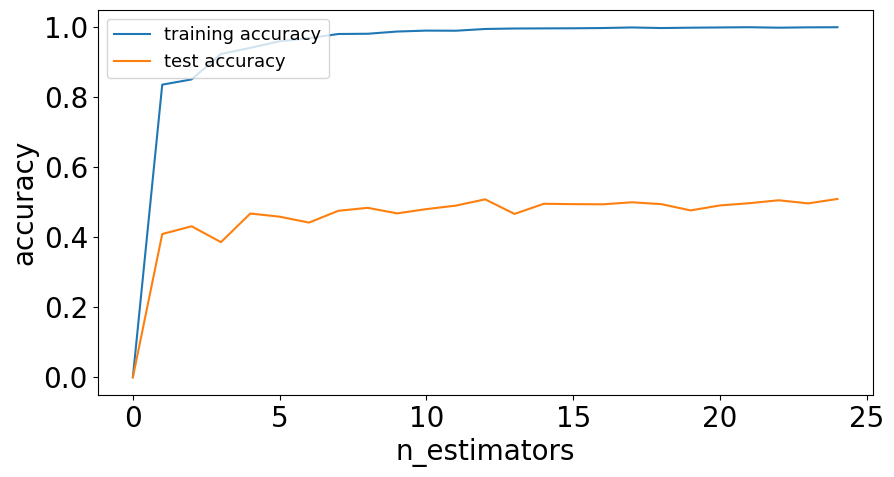

In [ ]:
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
train_accuracies = [0]
test_accuracies = [0]
# iterate over a n_estimators values
for i in range(1, 25):
    random_forest = RandomForestClassifier(n_estimators=i) #Create a new Random Forest Classifier model with the current n_estimators value.
    random_forest.fit(X_train, y_train) #Train the model on the training dataset.
    y_train_pred = random_forest.predict(X_train) #Use the model to predict the quality of samples in the training data set.
    y_test_pred = random_forest.predict(X_test) #Use the model to predict the quality of samples in a test data set.
    train_accuracy = metrics.accuracy_score(data_train.quality, y_train_pred) #Calculate the training accuracy score using the metrics.accuracy_score() function.
    test_accuracy = metrics.accuracy_score(y_test, y_test_pred) #Calculate the training accuracy score using the metrics.accuracy_score() function.
    # append accuracies
    #Add accuracy scores to the train_accuracies and test_accuracies lists.
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
# create two plots using matplotlib
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label="training accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 13})
plt.xticks(range(0, 26, 5))
plt.xlabel("n_estimators", size=20)
plt.ylabel("accuracy", size=20)
plt.show()